# Benchmarking 2D / 3D PORTRAITS + Correlation diagrams + Correlation factors 
--------

In [1]:
# import
from multidimvis_main import *

### TOY NETWORKS

In [321]:
# TREE GRAPH
organism = 'tree'
n = 1000 # number of nodes
r = 20 # branching factor
G = nx.full_rary_tree(r, n)

# STAR GRAPH
#organism = 'star'
#n = 1000
#G = nx.star_graph(n)

# CYCLE GRAPH
#organism = 'cycle'
#n = 1000
#G = nx.cycle_graph(n)

### GEOMETRIES 

In [322]:
# Torus 



In [323]:
# 3D crystal grid



## NETWORK

In [324]:
print('Number of nodes i.e. genes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.1f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

Number of nodes i.e. genes: 1000
Number of edges: 999
Network density: 0.2%


+ Feature Collection 

In [325]:
# DEGREE CENTRALITY - Node degree: important nodes being involved within high number of interactions
degs = dict(G.degree())
d_deghubs = {}
for node, de in sorted(degs.items(),key = lambda x: x[1], reverse = 1):
    d_deghubs[node] = round(float(de/max(degs.values())),4)
    
# CLOSENESS CENTRALITY - Measures how closely a node is connected to all other nodes to highlight f.ex. core-periphery structure, or identify central nodes
closeness = nx.closeness_centrality(G)
d_clos = {}
for node, cl in sorted(closeness.items(), key = lambda x: x[1], reverse = 1):
    d_clos[node] = round(cl,4)
    
# BETWEENESS CENTRALITY - How many shortest paths between pairs of other nodes in the network go through one node. High BC indicates "bottleneck nodes" in the network
betweens = nx.betweenness_centrality(G)
d_betw = {}
for node, be in sorted(betweens.items(), key = lambda x: x[1], reverse = 1):
     d_betw[node] = round(be,4)
    
# EIGENVECTOR CENTRALITY - Compute the eigenvector centrality for the graph
eigen = nx.eigenvector_centrality(G)
d_eigen = {}
for node, eig in sorted(eigen.items(), key = lambda x: x[1], reverse = 1):
     d_eigen[node] = round(eig,4)

In [326]:
d_deghubs_sorted = {key:d_deghubs[key] for key in sorted(d_deghubs.keys())}
d_clos_sorted = {key:d_clos[key] for key in sorted(d_clos.keys())}
d_betw_sorted = {key:d_betw[key] for key in sorted(d_betw.keys())}
d_eigen_sorted = {key:d_eigen[key] for key in sorted(d_eigen.keys())}

# feature collection
feature_dict = dict(zip(d_deghubs_sorted.keys(), zip(
                                                     d_deghubs_sorted.values(), 
                                                     d_clos_sorted.values(), 
                                                     d_betw_sorted.values(), 
                                                     d_eigen_sorted.values(),
                                                    )))

# IMPORTANT :
# sort all feature according to Graph node IDs
feature_dict_sorted = {key:feature_dict[key] for key in G.nodes()}
feature_df = pd.DataFrame.from_dict(feature_dict_sorted, orient = 'index', columns = ['degs', 
                                                                                      'clos', 
                                                                                      'betw', 
                                                                                      'eigen',
                                                                                      ]) 

In [327]:
feature_df.head()

,degs,clos,betw,eigen
0,0.9524,0.3907,0.7751,0.3689
1,1.0000,0.3680,0.6559,0.3961
2,1.0000,0.3164,0.3551,0.1553
3,1.0000,0.2842,0.0397,0.1042
4,1.0000,0.2842,0.0397,0.1042


+ Matrices

In [328]:
# Adjacency
A = nx.adjacency_matrix(G)
adj = A.toarray()
DM_adj = pd.DataFrame(adj, columns = list(G.nodes()), index=list(G.nodes()))

In [329]:
DM_adj 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
r = .8 # restart probability; originally 0.8
alpha = 1.0

DM_m = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))

DM_m_df = pd.DataFrame(DM_m)
# DM_m_df.sum(axis=0)

DM_m_transposed = DM_m_df.T
DM_m_transposed.index = list(G.nodes())

metric = "cosine" 
DM_m_new = pd.DataFrame(distance.squareform(distance.pdist(DM_m_transposed, metric)))

DM_m = pd.DataFrame(DM_m_new, columns = list(G.nodes()), index=list(G.nodes()))

In [331]:
DM_m

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.980441,0.980237,0.980064,0.980064,0.980064,0.980064,0.980064,0.980064,0.980064,...,0.999937,0.999937,0.999937,0.999937,0.999937,0.999937,0.999937,0.999937,0.999937,0.999937
1,0.980441,0.000000,0.999716,0.999714,0.999714,0.999714,0.999714,0.999714,0.999714,0.999714,...,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999
2,0.980237,0.999716,0.000000,0.999712,0.999712,0.999712,0.999712,0.999712,0.999712,0.999712,...,0.995812,0.995812,0.995812,0.995812,0.995812,0.995812,0.995812,0.995812,0.995812,0.995812
3,0.980064,0.999714,0.999712,0.000000,0.999711,0.999711,0.999711,0.999711,0.999711,0.999711,...,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999
4,0.980064,0.999714,0.999712,0.999711,0.000000,0.999711,0.999711,0.999711,0.999711,0.999711,...,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999937,0.999999,0.995812,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,...,0.954676,0.954676,0.954676,0.954676,0.954676,0.000000,0.954676,0.954676,0.954676,0.954676
996,0.999937,0.999999,0.995812,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,...,0.954676,0.954676,0.954676,0.954676,0.954676,0.954676,0.000000,0.954676,0.954676,0.954676
997,0.999937,0.999999,0.995812,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,...,0.954676,0.954676,0.954676,0.954676,0.954676,0.954676,0.954676,0.000000,0.954676,0.954676
998,0.999937,0.999999,0.995812,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,...,0.954676,0.954676,0.954676,0.954676,0.954676,0.954676,0.954676,0.954676,0.000000,0.954676


In [332]:
metric = "cosine" 
DM_cent = pd.DataFrame(distance.squareform(distance.pdist(feature_df, metric)))

In [333]:
DM_cent 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.004818,0.060198,0.191796,0.191796,0.191796,0.191796,0.191796,0.191796,0.191796,...,0.540017,0.540017,0.540017,0.540017,0.540017,0.540017,0.540017,0.540017,0.540017,0.540017
1,0.004818,0.000000,0.038631,0.146002,0.146002,0.146002,0.146002,0.146002,0.146002,0.146002,...,0.537785,0.537785,0.537785,0.537785,0.537785,0.537785,0.537785,0.537785,0.537785,0.537785
2,0.060198,0.038631,0.000000,0.041848,0.041848,0.041848,0.041848,0.041848,0.041848,0.041848,...,0.509145,0.509145,0.509145,0.509145,0.509145,0.509145,0.509145,0.509145,0.509145,0.509145
3,0.191796,0.146002,0.041848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516
4,0.191796,0.146002,0.041848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.540017,0.537785,0.509145,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.540017,0.537785,0.509145,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.540017,0.537785,0.509145,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.540017,0.537785,0.509145,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,0.506516,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [486]:
#feature = 'adj'
#DM = DM_adj

#feature = 'rwr'
#DM = DM_m

feature = 'cent'
DM = DM_cent

____________
# 3 | SET VISUAL PRE-SETTINGS
____________

### GENERAL NODE + EDGE PARAMETERS

In [487]:
# Node, Edge colors

edge_width = 0.1
edge_col = 'lightgrey'
edge_colordark = 'dimgrey'
opacity_edges = 1.0

opacity_nodes = 1.0
node_edge_col = None


# Node sizes 

scalef= 0.2
size = list(draw_node_degree(G, scalef).values())

scalef= 0.05
size3d = list(draw_node_degree_3D(G, scalef).values())

### SPECIFIC NODE + EDGE PARAMETERS

In [532]:
# ----------------------------------------------------        
# Define colour parameter with dict (gradient)
# ----------------------------------------------------        
color_method = 'degree'
d_to_be_coloured = d_deghubs # dict sorted by dict.values (that way the biggest value matches darkest colour of palette)


# Colouring
colour_groups = set(d_to_be_coloured.values())
colour_count = len(colour_groups)
pal = sns.color_palette('Reds', colour_count)
palette = pal.as_hex()

d_colourgroups = {}
for n in colour_groups:
    d_colourgroups[n] = [k for k in d_to_be_coloured.keys() if d_to_be_coloured[k] == n]
    
d_colourgroups_sorted = {key:d_colourgroups[key] for key in sorted(d_colourgroups.keys())}

d_val_col = {}
for idx,val in enumerate(d_colourgroups_sorted):
    for ix,v in enumerate(palette):
        if idx == ix:
            d_val_col[val] = v
d_node_colour = {}
for y in d_to_be_coloured.items(): # y[0] = node id, y[1] = val
    for x in d_val_col.items(): # x[0] = val, x[1] = (col,col,col)
        if x[0] == y[1]:
            d_node_colour[y[0]]=x[1]
            
# SORT dict based on G.nodes
d_node_colour_sorted = dict([(key, d_node_colour[key]) for key in G.nodes()])

l_col_clos = list(d_node_colour_sorted.values())

colours_hex = l_col_clos 


d_val_col = {}
for idx,val in enumerate(d_colourgroups_sorted):
    for ix,v in enumerate(pal):
        if idx == ix:
            d_val_col[val] = v
d_node_colour = {}
for y in d_to_be_coloured.items(): # y[0] = node id, y[1] = val
    for x in d_val_col.items(): # x[0] = val, x[1] = (col,col,col)
        if x[0] == y[1]:
            d_node_colour[y[0]]=x[1]
            
# SORT dict based on G.nodes
d_node_colour_sorted = dict([(key, d_node_colour[key]) for key in G.nodes()])

l_col = list(d_node_colour_sorted.values())
colours = l_col

# 2D PORTRAITS

### SPRING

In [533]:
%%time 

# ---------------------------------------
# Spring
# ---------------------------------------
forceatlas2 = ForceAtlas2()
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=200)
#posG_spring = nx.spring_layout(G, dim = 2)

100%|██████████| 200/200 [00:00<00:00, 231.66it/s]


BarnesHut Approximation  took  0.40  seconds
Repulsion forces  took  0.38  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds
CPU times: user 876 ms, sys: 20.1 ms, total: 896 ms
Wall time: 896 ms


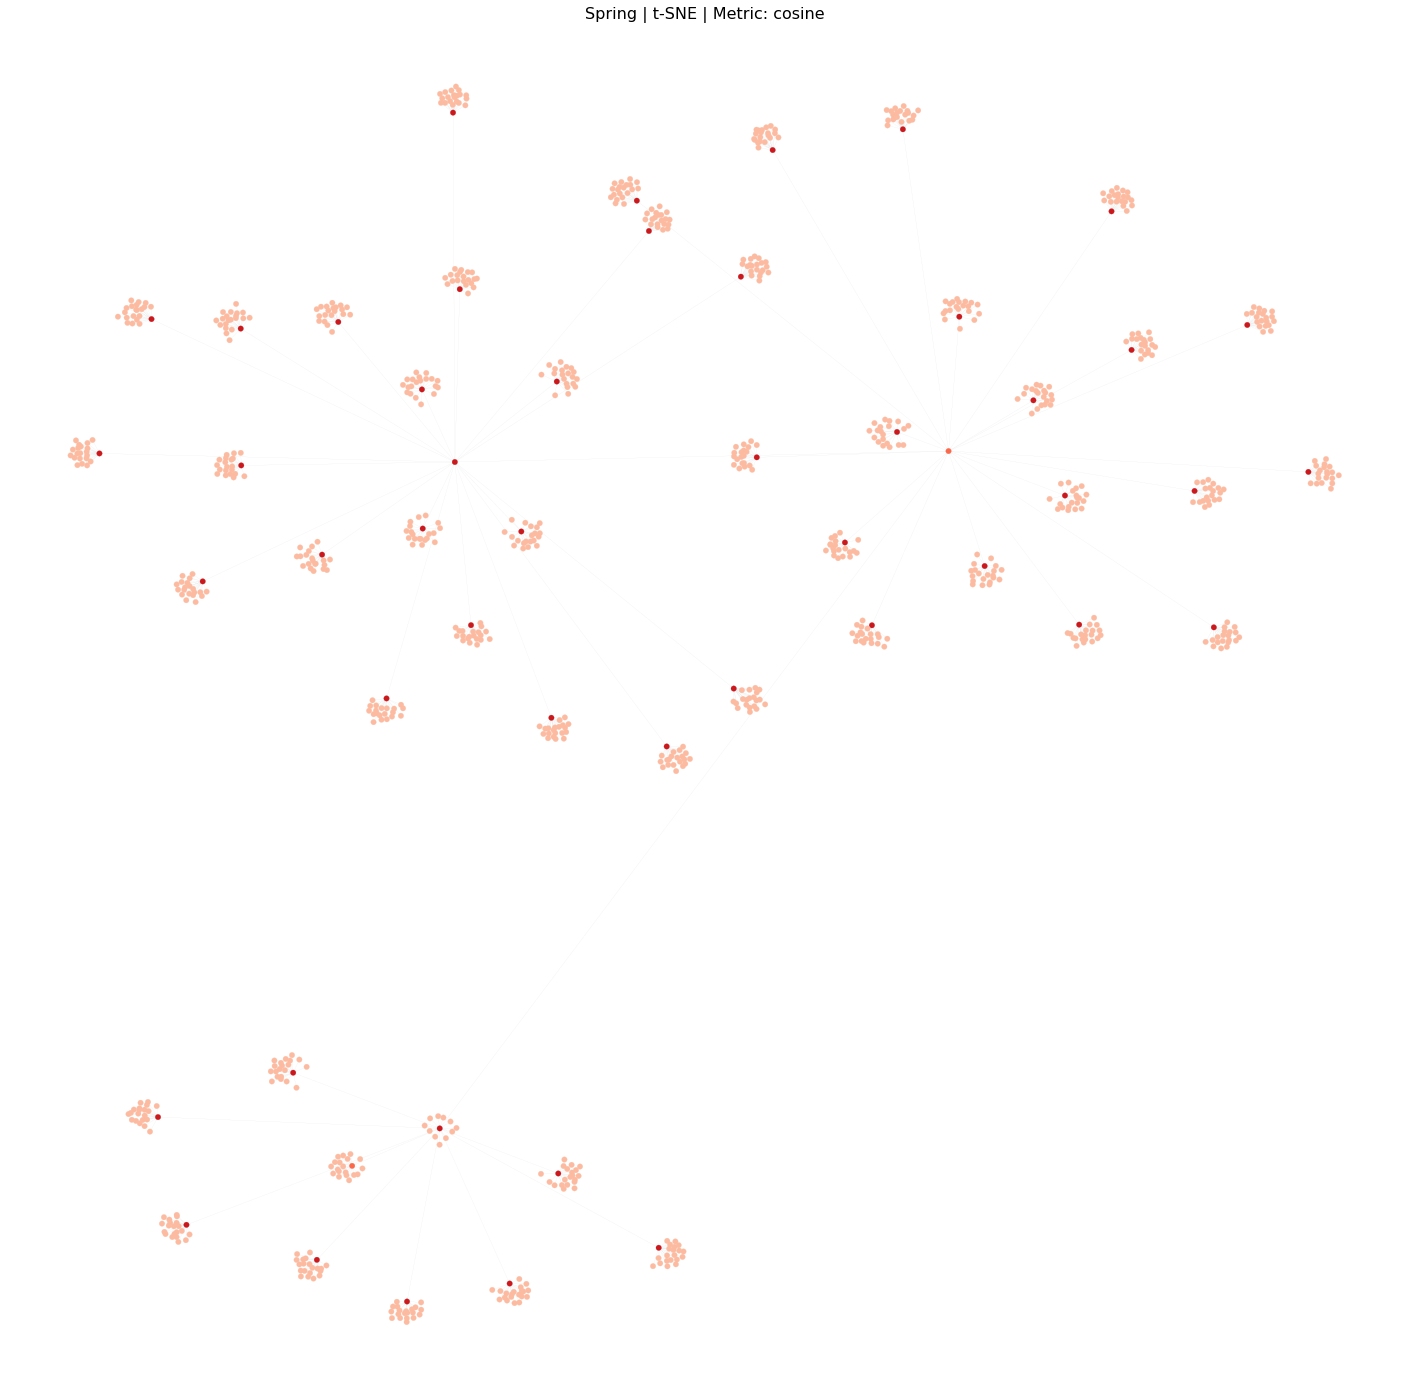

In [534]:
plt.figure(figsize=(25,25))
plt.title('Spring | t-SNE | Metric: '+metric, size= 16)

nx.draw_networkx_nodes(G, posG_spring, edgecolors = node_edge_col, linewidths = 0.25, node_color = colours, 
                       node_size= 30, #size, 
                       alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG_spring, width = edge_width, edge_color = edge_col, alpha = opacity_edges)

plt.box(False)

plt.savefig('output_plots/2Dspring.png')

plt.show()

### TSNE

In [535]:
prplxty = 200 # range: 5-50 / default = 30
density = 1.  # default 12.
l_rate = 1000 #default 200.
steps = 500 # min 250

metric = 'cosine'

In [536]:
%%time 
tsne = embed_tsne_2D(DM, prplxty, density, l_rate, steps, metric)

CPU times: user 20.2 s, sys: 630 ms, total: 20.8 s
Wall time: 3.34 s


In [537]:
posG_tsne = get_posG_2D(list(G.nodes()), tsne)
posG_complete_tsne = {key:posG_tsne[key] for key in G.nodes()}

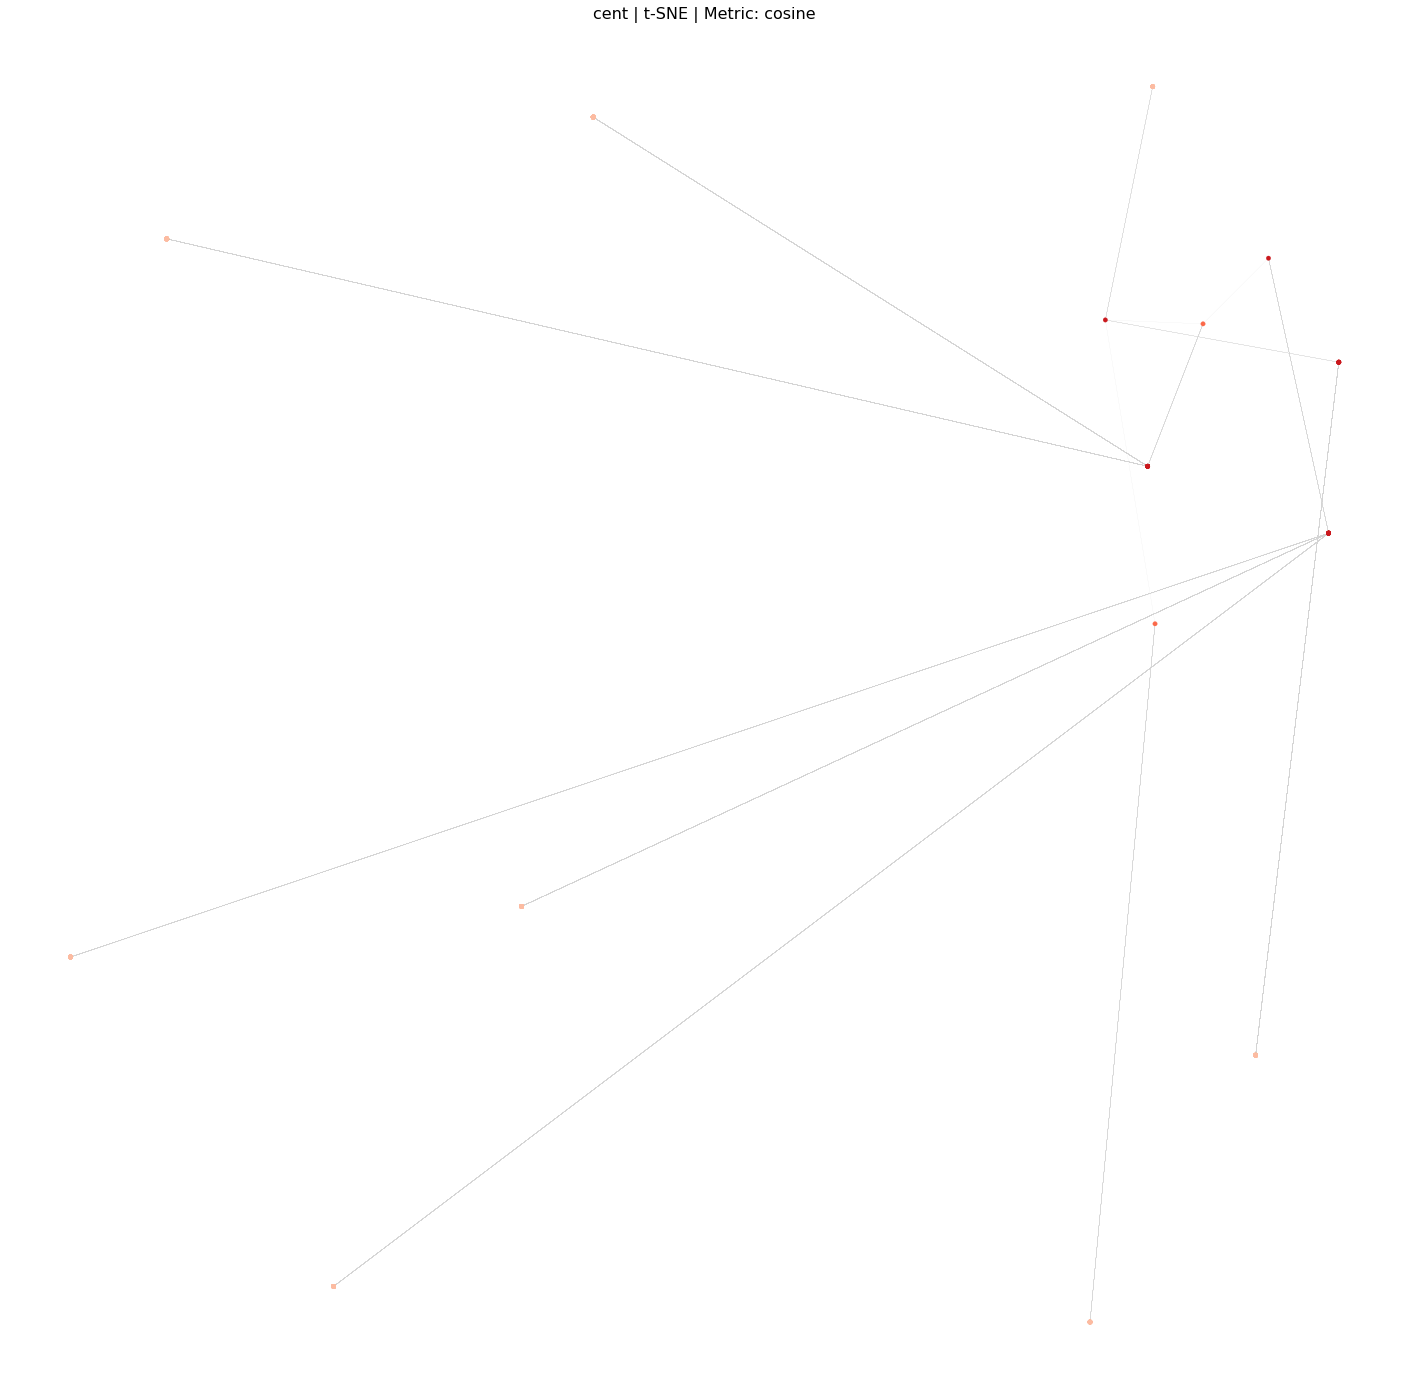

In [538]:
plt.figure(figsize=(25,25))
plt.title(feature+' | t-SNE | Metric: '+metric, size= 16)

nx.draw_networkx_nodes(G, posG_complete_tsne, edgecolors = node_edge_col, linewidths = 0.25, node_color = colours, 
                       node_size= 20, #size, 
                       alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG_complete_tsne, width = edge_width, edge_color = edge_col, alpha = opacity_edges)

plt.box(False)

plt.savefig('output_plots/2Dtoynetworktsne_'+feature+'_'+metric+'_'+str(prplxty)+'_'+str(density)+'_'+str(l_rate)+'_'+str(steps)
        +'_'+organism+'_'+color_method+'_nx.png')

plt.show()

### UMAP 

In [539]:
n_neighbors = 20 # balance between local and global structure in the data
spread = 50
min_dist = 0.01 # defines how dense points are stacked together 
metric ='cosine'

In [540]:
%%time 
umap = embed_umap_2D(DM, n_neighbors, spread, min_dist, metric)

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1158: RuntimeWarning:

divide by zero encountered in power



CPU times: user 21.6 s, sys: 206 ms, total: 21.8 s
Wall time: 6.28 s


In [541]:
posG_umap = get_posG_2D(genes, umap)
posG_complete_umap = {key:posG_umap[key] for key in G.nodes()}

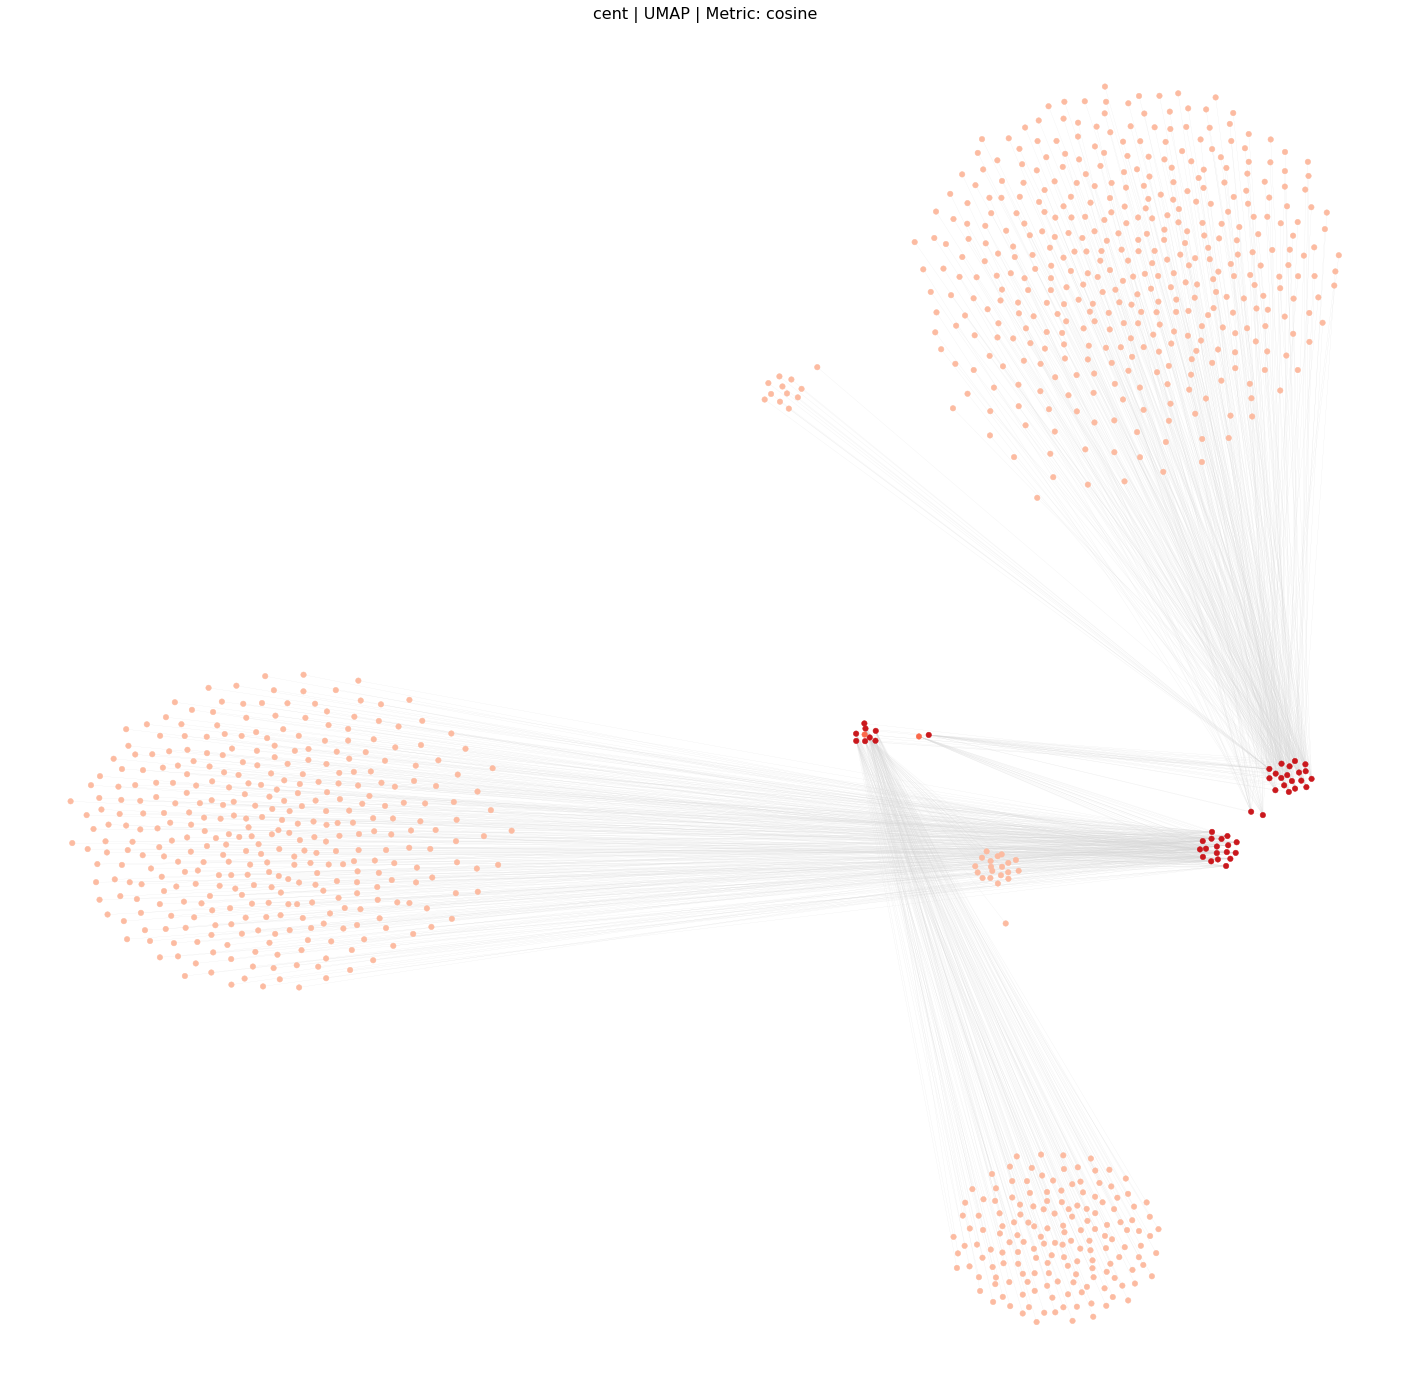

In [542]:
plt.figure(figsize=(25,25))
plt.title(feature+' | UMAP | Metric: '+metric, size=16)

nx.draw_networkx_nodes(G, posG_complete_umap, edgecolors = node_edge_col, linewidths = 0.5, node_color=colours, 
                       node_size = 30, #size, 
                       alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG_complete_umap, width = edge_width, edge_color = edge_color, alpha = opacity_edges)
plt.box(False)

plt.savefig('output_plots/2Dtoynetworkumap_'+feature+'_'+metric+'_'+color_method+'_'+str(n_neighbors)+'_'+str(spread)+'_'+str(min_dist)+'_'+organism+'.png')

plt.show()

# 3D PORTRAITS

### TSNE

In [543]:
prplxty3d = 50 # range: 5-50 / default = 30.#
density3d = 5.0 # default 12.
l_rate3d = 200 # default 200.
steps3d = 250 #min 250

metric = 'cosine'

In [544]:
%%time
tsne_3D = embed_tsne_3D(DM, prplxty3d, density3d, l_rate3d, steps3d)

CPU times: user 9.54 s, sys: 264 ms, total: 9.8 s
Wall time: 1.53 s


In [545]:
posG_3Dtsne = get_posG_3D(list(G.nodes()), tsne_3D)
posG_3D_complete_tsne = {key:posG_3Dtsne[key] for key in G.nodes()}

In [546]:
tsne_nodes = get_trace_nodes(posG_3D_complete_tsne, None, colours, 4) #size3d)
tsne_edges = get_trace_edges(G, posG_3D_complete_tsne, edge_col, 1.0)

tsne_data = [tsne_nodes, tsne_edges]
#tsne_data = [tsne_nodes]

In [547]:
print('Perplexity:', prplxty3d)
print('Early Exaggeration:', density3d)
print('Learning rate:', l_rate3d)
print('Iterations:', steps3d)

fig = pgo.Figure()
for i in tsne_data:
    fig.add_trace(i)
fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                    dragmode="turntable",
                    #annotations=annotations,
                ))
#py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dtoynetwork_tsne_'+feature+'_'+metric+'_'+str(prplxty)+'_'+str(density)+'_'+str(l_rate)+'_'+str(steps)+'_'+organism+'_'+color_method+'.html', auto_open=True)

Perplexity: 50
Early Exaggeration: 5.0
Learning rate: 200
Iterations: 250


'output_plots/3Dtoynetwork_tsne_cent_cosine_200_1.0_1000_500_tree_degree.html'

### UMAP 

In [548]:
n_neighbors = 2 # balance between local and global structure in the data
spread = 20
min_dist = 0.01 # defines how dense points are stacked together 
metric='cosine'

In [549]:
%%time 
umap_3D = embed_umap_3D(DM, n_neighbors, spread, min_dist, metric)

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1158: RuntimeWarning:

divide by zero encountered in power



CPU times: user 5.22 s, sys: 120 ms, total: 5.34 s
Wall time: 3.02 s


In [550]:
posG_3Dumap = get_posG_3D(list(G.nodes()), umap_3D)
posG_3D_complete_umap = {key:posG_3Dumap[key] for key in G.nodes()}

In [551]:
%%time 
umap_nodes = get_trace_nodes(posG_3D_complete_umap, None, colours, 2) # size3d)
umap_edges = get_trace_edges(G, posG_3D_complete_umap, edge_col, 1.0) 

umap_data = [umap_edges, umap_nodes]
#umap_data = [umap_nodes]

CPU times: user 73.8 ms, sys: 2.59 ms, total: 76.3 ms
Wall time: 75.3 ms


In [552]:
print('# Neighbours:', n_neighbors)
print('Spread:',spread)
print('Min. Distance:', min_dist)


fig = pgo.Figure()
for i in umap_data:
    fig.add_trace(i)

fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='black')),    
                    dragmode="turntable",
                    #annotations=annotations,
                ))    

#py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dtoynetwork_umap_'+feature+'_'+metric+'_'+color_method+'_'+str(n_neighbors)+'_'+str(spread)+'_'+str(min_dist)+'_'+organism+'_'+color_method+'.html', auto_open=True)

# Neighbours: 2
Spread: 20
Min. Distance: 0.01


'output_plots/3Dtoynetwork_umap_cent_cosine_degree_2_20_0.01_tree_degree.html'

_________

# EVALUATION OF 2D layout compared to Spring
### CALCULATE DISTANCES OF NODES IN LAYOUTS
+ Plots to test "Original Distances" with embeded Distances 
+ X-axis = distances of layout, Y-axis = actual Distance Matrix Distances

In [ ]:
# Distance from embeded Spring layout 
dist_coordinates_spring = calc_dist_from_layout(posG_spring)

# Distances from embeded coordinates from matrices 
dist_coordinates_layout = calc_dist_from_layout(posG_adj)

In [ ]:
# ADJ 
spring_adjtrace = [] 
for i in range(len(dist_spring)):
    spring_adjtrace.append(get_trace(dist_spring[i], DM_adj[i], "Spring", "darkgrey"))

adj_trace = []
for i in range(len(dist_adj)):
    adj_trace.append(get_trace(dist_adj[i], DM_adj[i], "Aij", "coral"))

data_adj = [
    spring_adjtrace, 
    adj_trace]


# SPL
spring_spltrace = [] 
for i in range(len(dist_spring)):
    spring_spltrace.append(get_trace(dist_spring[i], DM_spl[i], "Spring", "darkgrey"))

spl_trace = []
for i in range(len(dist_spring)):
    spl_trace.append(get_trace(dist_spl[i], DM_spl[i], "SPL", "darkorange"))

data_spl = [
    spring_spltrace, 
    spl_trace]


# MARKOV
spring_mtrace = [] 
for i in range(len(dist_spring)):
    spring_mtrace.append(get_trace(dist_spring[i], DM_m_mod[i], "Spring", "darkgrey"))

m_trace = []
for i in range(len(dist_spring)):
    m_trace.append(get_trace(dist_m[i], DM_m_mod[i], "Markov", "chocolate"))

data_m = [
    spring_mtrace, 
    m_trace]


# -log MARKOV
spring_mlogtrace = [] 
for i in range(len(dist_spring)):
    spring_mlogtrace.append(get_trace(dist_spring[i], DM_mlog[i], "Spring", "darkgrey"))

mlog_trace = []
for i in range(len(dist_spring)):
    mlog_trace.append(get_trace(dist_mlog[i], DM_mlog[i], "-log Markov", "orangered"))

data_mlog = [
    spring_mlogtrace, 
    mlog_trace]


# COSINE
spring_costrace = [] 
for i in range(len(dist_spring)):
    spring_costrace.append(get_trace(dist_spring[i], DM_cos[i], "Spring", "darkgrey"))

cos_trace = []
for i in range(len(dist_spring)):
    cos_trace.append(get_trace(dist_cos[i], DM_cos[i], "Cos", "royalblue"))

data_cos = [
    spring_costrace, 
    cos_trace]


# EUCLIDEAN
spring_eucltrace = [] 
for i in range(len(dist_spring)):
    spring_eucltrace.append(get_trace(dist_spring[i], DM_eucl[i], "Spring", "darkgrey"))

eucl_trace = []
for i in range(len(dist_spring)):
    eucl_trace.append(get_trace(dist_eucl[i], DM_eucl[i], "Eucl", "navy"))

data_eucl = [
    spring_eucltrace, 
    eucl_trace]


# SQUARED EUCLIDEAN
spring_sqeucltrace = [] 
for i in range(len(dist_spring)):
    spring_sqeucltrace.append(get_trace(dist_spring[i], DM_sqeucl[i], "Spring", "darkgrey"))

sqeucl_trace = []
for i in range(len(dist_spring)):
    sqeucl_trace.append(get_trace(dist_sqeucl[i], DM_sqeucl[i], "Sq Eucl", "slategrey"))

data_sqeucl = [
    spring_sqeucltrace, 
    sqeucl_trace]


# CORRELATION
spring_corrtrace = [] 
for i in range(len(dist_spring)):
    spring_corrtrace.append(get_trace(dist_spring[i], DM_corr[i], "Spring", "darkgrey"))

corr_trace = []
for i in range(len(dist_spring)):
    corr_trace.append(get_trace(dist_corr[i], DM_corr[i], "Corr", "cornflowerblue"))

data_corr = [
    spring_corrtrace, 
    corr_trace]

In [ ]:
fig = make_subplots(rows = 2, cols = 4,
                    specs=2*[4 * [{'type': 'Scatter'}]],
                    print_grid=False, 
                    subplot_titles=('Aij', 
                                    'SPL',
                                    'Markov',
                                    '-log Markov',
                                   'Cosine',
                                   'Euclidean',
                                   'Squared Euclidean',
                                   'Correlation')
                   )

    
for i in data_adj:
    for j in i:
        fig.add_trace(j, row=1, col=1)
    
for i in data_spl:
    for j in i:
        fig.add_trace(j, row=1, col=2)
    
for i in data_m:
    for j in i:
        fig.add_trace(j, row=1, col=3)

for i in data_mlog:
    for j in i:
        fig.add_trace(j, row=1, col=4)
        
    
for i in data_cos:
    
    for j in i:
        fig.add_trace(j, row=2, col=1)
    
for i in data_eucl:
    for j in i:
        fig.add_trace(j, row=2, col=2)
    
for i in data_sqeucl:
    for j in i:
        fig.add_trace(j, row=2, col=3)

for i in data_corr:
    for j in i:
        fig.add_trace(j, row=2, col=4)

fig.update_xaxes(title_text = "Embedded Distances")
fig.update_yaxes(title_text = "Calculated Distances")

fig.update_layout(
    #xaxis_type="log", 
    #yaxis_type="log",
    template='none',showlegend = False,
    height=1600,
    width=1800
)

fig.write_image("output_plots/Diagram_Comparison_2D_DM_Embedded.png")

print('Number of Nodes:', len(G.nodes()))
fig.show()

# Statistical Test for correlation between data sets (DMs to Layouts): 
### Pearson Correlation
+ Pearson product-moment correlation coefficients
+ The relationship between the correlation coefficient matrix, R, and the covariance matrix, C
+ Value can range from -1 to 1, the closer to 1 the more positive linear correlation ( the closer to -1 the more negative linear correlation)

In [ ]:
# Pearson Correlation coefficient comparison of Spring- to Layouts-coordinates

print('Number of Nodes: ', len(G.nodes()))
print('')

# Aij 
pearson_spring_adj = np.corrcoef(dist_spring,DM_adj)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring_adj),4))

pearson_adj = np.corrcoef(dist_adj,DM_adj)
print('Aij: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_adj),4))

print('')

# SPL
pearson_spring_spl = np.corrcoef(dist_spring,DM_spl)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring_spl),4))

pearson_spl = np.corrcoef(dist_spl,DM_spl)
print('SPL: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spl),4))

print('')

# Markov
pearson_spring_m = np.corrcoef(dist_spring, DM_m_mod)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring_m),4))

pearson_m = np.corrcoef(dist_m,DM_m_mod)
print('Markov: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_m),4))

print('')
 
    
# -log Markov
pearson_spring_mlog = np.corrcoef(dist_spring,DM_mlog)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring_mlog),4))

pearson_mlog = np.corrcoef(dist_mlog,DM_mlog)
print('-log Markov: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_mlog),4))

print('')


# Cos
pearson_spring_cos = np.corrcoef(dist_spring,DM_cos)
print('Spring: Mean of Pearson Correlation Coefficient: ', round(np.mean(pearson_spring_cos),4))

pearson_cos = np.corrcoef(dist_cos,DM_cos)
print('Cosine: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_cos),4))
 
print('')


# Eucl
pearson_spring_eucl = np.corrcoef(dist_spring,DM_eucl)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring_eucl),4))

pearson_eucl = np.corrcoef(dist_eucl,DM_eucl)
print('Euclidean: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_eucl),4))

print('')
  
    
# SqEucl
pearson_spring_sqeucl = np.corrcoef(dist_spring,DM_sqeucl)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring_sqeucl),4))

pearson_sqeucl = np.corrcoef(dist_sqeucl,DM_sqeucl)
print('Squared Euclidean: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_sqeucl),4))

print('')


# Corr
pearson_spring_corr = np.corrcoef(dist_spring,DM_corr)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring_corr),4))

pearson_corr = np.corrcoef(dist_corr,DM_corr)
print('Correlation: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_corr),4))

### Spearman Correlation 
+ to summarize the strength of the linear relationship between two data samples (Rank correlation)
+ Compared to Pearson: assumes a non-gaussian distribution and less sensitive to outliers that are in the tail of both samples - because of limiting the outliers to the value of their ranks 
+ Value can range from -1 to 1, the closer to 1 the more monotonic relationship between X and Y

In [ ]:
from scipy.stats import spearmanr

print('Number of Nodes: ', len(G.nodes()))
print('')

# Spearman Correlation coefficient comparison of Spring- to Layouts-coordinates
# Aij 
spearman_spring_adj, _ = spearmanr(DM_adj, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_adj),4))

spearman_adj, _ = spearmanr(DM_adj, dist_adj)
print('Aij: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_adj),4))

print('')
      
      
# SPL
spearman_spring_spl, _ = spearmanr(DM_spl, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_spl),4))

spearman_spl, _ = spearmanr(DM_spl,dist_spl)
print('SPL: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spl),4))

print('')

      
# Markov
spearman_spring_m, _ = spearmanr(DM_m_mod, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_m),4))

spearman_m, _ = spearmanr(DM_m_mod,dist_m)
print('Markov: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_m),4))

print('')

       
# -log Markov
spearman_spring_mlog, _ = spearmanr(DM_mlog, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_mlog),4))

spearman_mlog, _ = spearmanr(DM_mlog,dist_mlog)
print('-log Markov: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_mlog),4))

print('')

       
# Cos
spearman_spring_cos, _ = spearmanr(DM_cos, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_cos),4))

spearman_cos, _ = spearmanr(DM_cos,dist_cos)
print('Cosine: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_cos),4))

print('')

       
# Eucl
spearman_spring_eucl, _ = spearmanr(DM_eucl, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_eucl),4))

spearman_eucl, _ = spearmanr(DM_eucl,dist_eucl)
print('Euclidean: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_eucl),4))

print('')
      
      
# SqEucl
spearman_spring_sqeucl, _ = spearmanr(DM_sqeucl, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_sqeucl),4))

spearman_sqeucl, _ = spearmanr(DM_cos,dist_sqeucl)
print('Squared Euclidean: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_sqeucl),4))

print('')

    
# Corr
spearman_spring_corr, _ = spearmanr(DM_corr, dist_spring)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring_corr),4))

spearman_corr, _ = spearmanr(DM_corr,dist_corr)
print('Correlation: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_corr),4))

### WORK IN PROGRESS Plot - Regression Line 

In [ ]:
from sklearn.linear_model import LinearRegression

X = dist_spl[0]
Y = DM_spl[0]
df = pd.DataFrame({'X': X, 'Y':Y})

reg = LinearRegression().fit(np.vstack(df['X']), Y)
df['bestfit'] = reg.predict(np.vstack(df['X']))

fig=pgo.Figure()
fig.add_trace(pgo.Scatter(name='Embedded Distance vs Matrix Distance', x=df['X'], y=df['Y'].values, 
                          mode='markers'))
fig.add_trace(pgo.Scatter(name='line of best fit', x=X, y=df['bestfit'], 
                          mode='lines'))
fig.update_layout(template='none',
                  height = 600,
                  width = 800,
                  xaxis_title = 'Embedded Distances', yaxis_title = 'Matrix Distances')
print('Linear Regression Line for 1. set of Distances of SPL Matrix and SPL Layout Distances')
fig.show()

In [ ]:
posG_3D = nx.spring_layout(G, dim = 3, iterations=200)
